In [1]:
from math import remainder, tau
import numpy as np
import scipy.special as spe
import matplotlib.pyplot as plt
from scipy.integrate import quad
from scipy.integrate import cumulative_trapezoid
from scipy.integrate import odeint
from numpy.polynomial import polynomial as P
import scienceplots
import math

plt.style.use(['science', 'no-latex'])

[-1.12538236  0.48827737  0.70710678]


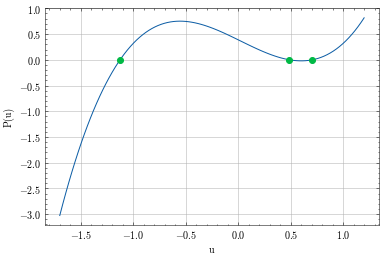

In [14]:
def pol_an(S, m, l, g):
    th0, ph0, dth0, dph0 = S
    p_ph = np.sin(th0)**2*dph0
    w_2 = g/l
    k = np.cos(th0)
    h = .5*dth0**2+p_ph**2/2/np.sin(th0)**2-w_2*np.cos(th0)
    p = (p_ph**2/2/w_2-h/w_2, -1, h/w_2, 1)
    roots = P.polyroots(p)
    return p, roots

def pol(x, p):
    return p[0]+p[1]*x+p[2]*x**2+p[3]*x**3

S = np.array([np.pi/4, 0, 5, 5])
p, roots = pol_an(S, 1, 1, 9.81)
u = np.linspace(-1.7, 1.2, 100)
plt.plot(u, pol(u, p))
plt.plot(roots, pol(roots, p),'o')
plt.xlabel('u')
plt.ylabel('P(u)')
plt.grid()
print(roots)

-0.6867175234400325

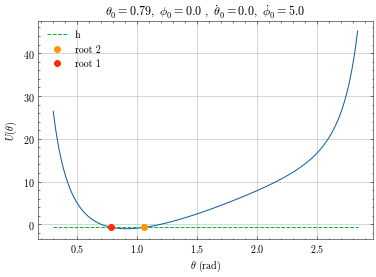

In [16]:
def pot(S, S0, m, l, g):
    th, ph, dth, dph = S
    th0, ph0, dth0, dph0 = S0
    p_ph = np.sin(th0)**2*dph0
    w_2 = g/l
    k = np.cos(th0)
    h = .5*(dth0**2+p_ph**2/np.sin(th0)**2)-w_2*np.cos(th0)
    return .5*p_ph**2/np.sin(th)**2-w_2*np.cos(th), h

th = np.linspace(0.3, np.pi-0.3, 1000)
ph = np.zeros(len(th))
dth = np.zeros(len(th))
dph = 0.5*np.ones(len(th))
S0 = np.array([np.pi/4, 0, 0, 5])
k = np.cos(S0[0])
S = np.array([th, ph, dth, dph])
U, h = pot(S, S0, 1, 1, 9.81)

th1, th2 = np.arccos(roots[1]), np.arccos(roots[2])

plt.plot(th, U)
plt.plot(th, h*np.ones(len(th)),'--', label = 'h')
plt.plot(th1, pot([th1, 0, 5 , 5], [np.pi/4, 0, 5, 5], 1 ,1 , 9.81)[0], 'o', label='root 2')
plt.plot(th2, pot([th2, 0, 5 , 5], [np.pi/4, 0, 5, 5], 1 ,1 , 9.81)[0], 'o', label = 'root 1')
plt.xlabel(r'$\theta$ (rad)')
plt.ylabel(r'$U(\theta)$')
plt.title(r'$\theta_0 = $'+str(round(S0[0], 2))+'$, \ \phi_0 = $'+str(round(S0[1], 2))+r' $, \ \dot{\theta}_0 = $'+str(round(S0[2], 2))+'$, \ \dot{\phi}_0 = $'+str(round(S0[-1], 2)))
plt.grid()
plt.legend()

h

In [32]:
def theta(S0, t, m, l, g):
    th0, ph0, dth0, dph0 = S0
    p_ph = np.sin(th0)**2*dph0
    w_2 = g/l
    k = np.cos(th0)
    h = .5*(dth0**2+p_ph**2/np.sin(th0)**2)-w_2*np.cos(th0)
    p = (.5*p_ph**2/w_2-h/w_2, -1, h/w_2, 1)
    b3, b2, b1 = P.polyroots(p)
    lamba, m = .5*np.sqrt(b1-b3), (b1-b2)/(b1-b3)
    if dth0 ==0:
        arg = spe.ellipk(m)-math.copysign(1, dth0)*lamba*np.sqrt(2*w_2)*t
    else:
        vph0 = np.arcsin(np.sqrt((k-b2)/m/(k-b3)))
        arg = spe.ellipkinc(vph0, m)-math.copysign(1, dth0)*lamba*np.sqrt(2*w_2)*t
    th = np.arccos((m*b3*spe.ellipj(arg,m)[0]**2-b2)/(m*spe.ellipj(arg,m)[0]**2-1))
    fun = p_ph/np.sin(th)**2
    I = cumulative_trapezoid(fun, t)
    ph = np.concatenate((np.array([0]), ph0+I))
    return th, ph

S0 = np.array([np.pi/4, 0, 0, 5])
tf = np.linspace(0, 5, 1000)
th_sol, ph_sol = theta(S0, tf, 1, 1, 9.81)
#ph_sol = phi(tf, S0, 1, 1, 9.81)
def potential(th, S0, m, l, g):
    th0, ph0, dth0, dph0 = S0
    p_ph = np.sin(th0)**2*dph0
    w_2 = g/l
    h = .5*dth0**2+p_ph**2/2/np.sin(th0)**2-w_2*np.cos(th0)
    return p_ph**2/2/np.sin(th)**2-w_2*np.cos(th), h
poten = lambda the: 1/np.sqrt(potential(the, S0, 1, 1, 9.81)[1]-potential(the, S0, 1, 1, 9.81)[0])
tau = np.sqrt(2)*quad(poten, th2, th1)[0]
tau

1.0814521102510104

Text(0.5, 0.01, '$\\theta_0 = $0.79$, \\ \\phi_0 = $0.0 $, \\ \\dot{\\theta}_0 = $0.0$, \\ \\dot{\\phi}_0 = $2.5')

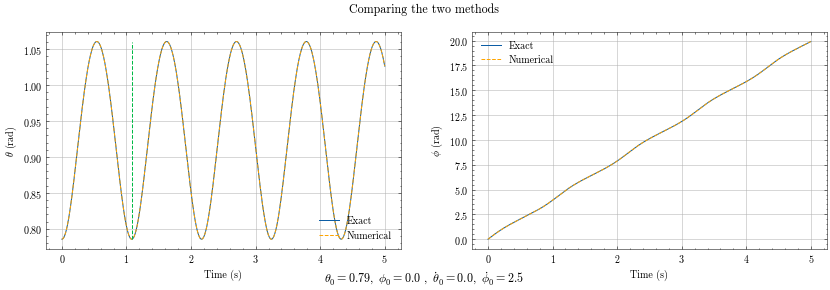

In [33]:
def dSdt(S, t, m, l, g):
  th, phi, p_th, p_ph = S  # Coordenadas y momentos
  dth, dph = p_th, p_ph/np.sin(th)**2  # Derivadas de las coordenadas
  dp_th, dp_ph = p_ph**2*np.cos(th)/np.sin(th)**3-(g/l)*np.sin(th), 0  # Derivadas de los momentos
  return [dth, dph, dp_th, dp_ph]

S0 = np.array([np.pi/4, 0, 0, 5*np.sin(np.pi/4)**2])
tf = np.linspace(0, 5, 1000)
Sol = odeint(dSdt, S0, tf, args=(1, 1, 9.81))
the_ode, ph_ode = Sol[:, 0], Sol[:, 1]
fig, axes = plt.subplots(1, 2, figsize = (14, 4))
axes[0].set_xlabel('Time (s)')
axes[0].set_ylabel(r'$\theta$ (rad)')
axes[0].plot(tf, th_sol, label = 'Exact')
axes[0].plot(tf, the_ode, '--', color='orange', label = 'Numerical')
axes[0].plot(tau*np.ones(100), np.linspace(min(th_sol), max(th_sol), 100), '--')
axes[0].grid()
axes[0].legend(loc='lower right')
axes[1].set_xlabel('Time (s)')
axes[1].set_ylabel(r'$\phi$ (rad)')
axes[1].plot(tf, ph_sol, label = 'Exact')
axes[1].plot(tf, ph_ode, '--', color='orange', label = 'Numerical')
axes[1].grid()
axes[1].legend()
fig.suptitle('Comparing the two methods')
txt=r'$\theta_0 = $'+str(round(S0[0], 2))+'$, \ \phi_0 = $'+str(round(S0[1], 2))+r' $, \ \dot{\theta}_0 = $'+str(round(S0[2], 2))+'$, \ \dot{\phi}_0 = $'+str(round(S0[-1], 2))
plt.figtext(0.5, 0.01, txt, wrap=True, horizontalalignment='center', fontsize=12)

In [114]:
def planpend(S, t, m=1, l=1, g=9.81):
   th0, ph0, dth0, dph0 = S0
   w_2 = g/l
   h = .5*dth0**2-w_2*np.cos(th0)
   print(h-w_2)
   if h == w_2:
      th = 2* np.arcsin(np.tanh(np.arctanh(np.sin(th0/2))+math.copysign(1, dth0)*np.sqrt(w_2)*t))
   elif h < w_2:
      beta = np.arccos(-h/w_2)
      k = np.sin(beta/2)
      K = spe.ellipkinc(np.arcsin(np.sin(th0/2)/k), k**2)
      sn = spe.ellipj(K+math.copysign(1, dth0)*np.sqrt(w_2)*t,k**2)[0]
      th = 2*np.arcsin(k*sn)
   else:
      m1 = 2*w_2/(h+w_2)
      K = spe.ellipkinc(np.sin(th0/2), m1)
      sn, cn, dn, phJ = spe.ellipj(K+math.copysign(dth0)*np.sqrt((h+w_2)/2)*t,m1)
      th = 2*np.sign(cn)*np.arcsin(sn)
   ph = np.zeros(len(t))
   return th, ph

def dSdt2(S, t, m, l, g):
  th, phi, p_th, p_ph = S  # Coordenadas y momentos
  dth, dph = p_th, 0  # Derivadas de las coordenadas
  dp_th, dp_ph = -(g/l)*np.sin(th), 0  # Derivadas de los momentos
  return [dth, dph, dp_th, dp_ph]

-16.746717523440033


Text(0.5, 0.01, '$\\theta_0 = $0.79$, \\ \\phi_0 = $0.0 $, \\ \\dot{\\theta}_0 = $0.0$, \\ \\dot{\\phi}_0 = $0.0')

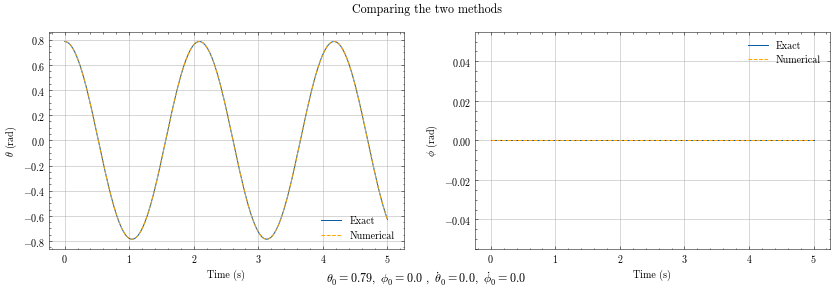

In [115]:
S0 = np.array([np.pi/4, 0, 0, 0])
def potential(th, S0, m, l, g):
    th0, ph0, dth0, dph0 = S0
    w_2 = g/l
    h = .5*dth0**2-w_2*np.cos(th0)
    k = np.sin(np.arccos(-h/w_2)/2)
    p = (1, 0, -(1+k**2), 0, k**2)
    roots = P.polyroots(p)
    thetas = 2*np.arcsin(k*roots)
    return -w_2*np.cos(th), h, thetas

'''poten = lambda the: 1/np.sqrt(potential(the, S0, 1, 1, 9.81)[1]-potential(the, S0, 1, 1, 9.81)[0])
thetas = potential(1, S0, 1, 1, 9.81)[2][1:3]
print(thetas)
tau = -np.sqrt(2)*quad(poten, thetas[1], thetas[0])[0]
print(tau)'''

tf = np.linspace(0, 5, 1000)
Sol = odeint(dSdt2, S0, tf, args=(1, 1, 9.81))
the, phe = planpend(S0, tf, 1, 1, 9.81)
fig, axes = plt.subplots(1, 2, figsize = (14, 4))
axes[0].set_xlabel('Time (s)')
axes[0].set_ylabel(r'$\theta$ (rad)')
axes[0].plot(tf, the, label = 'Exact')
axes[0].plot(tf, Sol[:, 0], '--', color='orange', label = 'Numerical')
#axes[0].plot(tau*np.ones(100), np.linspace(min(the), max(the), 100), '--')
axes[0].grid()
axes[0].legend(loc='lower right')
axes[1].set_xlabel('Time (s)')
axes[1].set_ylabel(r'$\phi$ (rad)')
axes[1].plot(tf, phe, label = 'Exact')
axes[1].plot(tf, Sol[:, 1], '--', color='orange', label = 'Numerical')
axes[1].grid()
axes[1].legend()
fig.suptitle('Comparing the two methods')
txt=r'$\theta_0 = $'+str(round(S0[0], 2))+'$, \ \phi_0 = $'+str(round(S0[1], 2))+r' $, \ \dot{\theta}_0 = $'+str(round(S0[2], 2))+'$, \ \dot{\phi}_0 = $'+str(round(S0[-1], 2))
plt.figtext(0.5, 0.01, txt, wrap=True, horizontalalignment='center', fontsize=12)

In [54]:
def cartesian(the, phi, m, l, g):
    x, y, z = l*np.sin(the)*np.cos(phi), l*np.sin(the)*np.sin(phi), -l*np.cos(the)
    return x, y, z

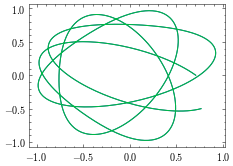

In [58]:
x_sol, y_sol, z_sol = cartesian(th_sol, ph_sol, 1, 1 , 9.81)
x_ode, y_ode, z_ode = cartesian(the_ode, ph_ode, 1, 1 , 9.81)
plt.plot(x_sol, y_sol)
plt.plot(x_ode, y_ode)

In [61]:
np.sort(np.array([2, 1, 3]))

array([1, 2, 3])